## Importando bibliotecas para EDA

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
def eda(df):
    """
    Gera uma dataframe com informações relevantes sobre o mesmo.
    Generates a dataframe with relevant information about it
    
    :param df: pd.DataFrame para ser realizada a exploração
    :param df: pd.DataFrameto be explored
    """
    
    explorar = pd.DataFrame({
        'coluna' : df.columns,
        'tipo' : df.dtypes,
        'qtd_nulo' : df.isnull().sum()
    })
    
    explorar['percent_nulo'] = np.round((explorar.qtd_nulo / df.shape[0]) * 100, 4)
    
    return explorar.sort_values(by='qtd_nulo', ascending=False)

## Importando arquivos da base de dados

In [3]:
treino = pd.read_csv('data/train.csv')

In [4]:
treino.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


### Renomeando as colunas

In [5]:
treino.columns = ["id", "semana", "loja_id", "refeicao_id", "preco_checkout", "preco_base", "email_para_promocao",
              "pagina_destaque", "qtd_pedido" ]

### Verificando a quantidade de valores únicos de cada variável

In [6]:
treino.nunique()

id                     456548
semana                    145
loja_id                    77
refeicao_id                51
preco_checkout           1992
preco_base               1907
email_para_promocao         2
pagina_destaque             2
qtd_pedido               1250
dtype: int64

In [7]:
eda(treino)

,coluna,tipo,qtd_nulo,percent_nulo
id,id,int64,0,0.0
semana,semana,int64,0,0.0
loja_id,loja_id,int64,0,0.0
refeicao_id,refeicao_id,int64,0,0.0
preco_checkout,preco_checkout,float64,0,0.0
preco_base,preco_base,float64,0,0.0
email_para_promocao,email_para_promocao,int64,0,0.0
pagina_destaque,pagina_destaque,int64,0,0.0
qtd_pedido,qtd_pedido,int64,0,0.0


In [8]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   456548 non-null  int64  
 1   semana               456548 non-null  int64  
 2   loja_id              456548 non-null  int64  
 3   refeicao_id          456548 non-null  int64  
 4   preco_checkout       456548 non-null  float64
 5   preco_base           456548 non-null  float64
 6   email_para_promocao  456548 non-null  int64  
 7   pagina_destaque      456548 non-null  int64  
 8   qtd_pedido           456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
treino.describe()

,id,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


## Arquivo meal_info.csv

In [10]:
refeicao_info = pd.read_csv('data/meal_info.csv')

In [11]:
refeicao_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:
refeicao_info.columns = ["refeicao_id", "categoria", "cozinha"]

In [13]:
eda(refeicao_info)

,coluna,tipo,qtd_nulo,percent_nulo
refeicao_id,refeicao_id,int64,0,0.0
categoria,categoria,object,0,0.0
cozinha,cozinha,object,0,0.0


In [14]:
refeicao_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   refeicao_id  51 non-null     int64 
 1   categoria    51 non-null     object
 2   cozinha      51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [15]:
refeicao_info.describe()

,refeicao_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


## Arquivo fulfilment_center_info.csv

In [16]:
loja = pd.read_csv('data/fulfilment_center_info.csv')

In [17]:
loja.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [18]:
eda(loja)

,coluna,tipo,qtd_nulo,percent_nulo
center_id,center_id,int64,0,0.0
city_code,city_code,int64,0,0.0
region_code,region_code,int64,0,0.0
center_type,center_type,object,0,0.0
op_area,op_area,float64,0,0.0


In [19]:
loja.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [20]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [21]:
loja.columns = ["loja_id", "cidade_codigo", "regiao_codigo", "loja_tipo", "op_area"]

### Juntando os 3 dataframes

In [22]:
df = treino.merge(refeicao_info, on="refeicao_id").merge(loja, on="loja_id")

In [23]:
df.head()

,id,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido,categoria,cozinha,cidade_codigo,regiao_codigo,loja_tipo,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [24]:
df.drop(columns='id', inplace=True)

## Alterar tipo de dados

In [25]:
df.dtypes

semana                   int64
loja_id                  int64
refeicao_id              int64
preco_checkout         float64
preco_base             float64
email_para_promocao      int64
pagina_destaque          int64
qtd_pedido               int64
categoria               object
cozinha                 object
cidade_codigo            int64
regiao_codigo            int64
loja_tipo               object
op_area                float64
dtype: object

In [26]:
df = df.astype({
    'email_para_promocao' : 'bool',
    'pagina_destaque' : 'bool', 
    'categoria' : 'category',
    'cozinha' : 'category',
    'loja_tipo' : 'category',
    'cidade_codigo' : 'category',
    'regiao_codigo' : 'category'
})

In [27]:
df.dtypes

semana                    int64
loja_id                   int64
refeicao_id               int64
preco_checkout          float64
preco_base              float64
email_para_promocao        bool
pagina_destaque            bool
qtd_pedido                int64
categoria              category
cozinha                category
cidade_codigo          category
regiao_codigo          category
loja_tipo              category
op_area                 float64
dtype: object

In [28]:
df.describe()

,semana,loja_id,refeicao_id,preco_checkout,preco_base,qtd_pedido,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,261.872760,4.083590
std,41.524956,45.975046,547.420920,152.939723,160.715914,395.922798,1.091686
min,1.000000,10.000000,1062.000000,2.970000,55.350000,13.000000,0.900000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,54.000000,3.600000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,136.000000,4.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,324.000000,4.500000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,24299.000000,7.000000


## Identificando e removendo outliers

### Variável Preço checkout

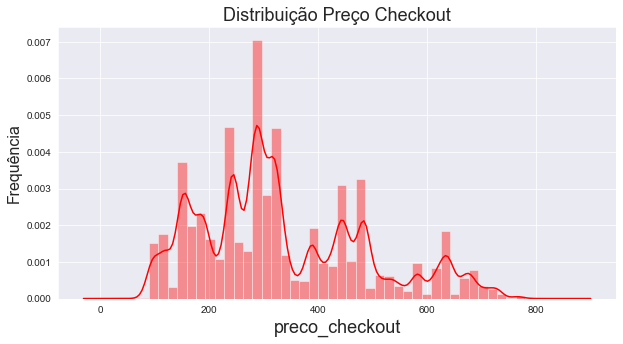

In [29]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Preço Checkout', fontsize=18)
plt.xlabel('',fontsize=18)
plt.ylabel('Frequência',fontsize=16)

sns.distplot(df.preco_checkout, color='r')
plt.show()

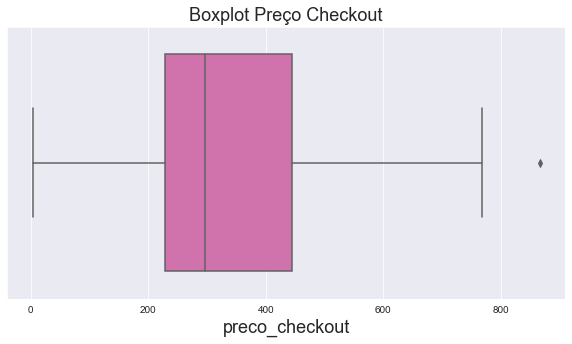

In [30]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Preço Checkout', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='preco_checkout', data=df, palette='PuRd')

plt.show()

### Remover outliers usando Amplitude Interquartil

In [31]:
df.preco_checkout.sort_values(ascending=True) # Muito estranho esse preço de 2.97

258782      2.97
330131     45.62
330125     47.59
5683       53.41
86311      55.35
           ...  
454542    767.33
203746    767.33
203754    767.33
104775    767.33
53130     866.27
Name: preco_checkout, Length: 456548, dtype: float64

### Apesar de que no boxplot não parecer como um outlier, claramente podemos classificar visto que o preço base é 316.25

In [32]:
df[df.preco_checkout < 45]

,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido,categoria,cozinha,cidade_codigo,regiao_codigo,loja_tipo,op_area
258782,38,73,1230,2.97,316.25,False,False,14,Beverages,Continental,576,34,TYPE_A,4.0


In [33]:
df.drop(labels=[258782], axis=0, inplace=True)

In [34]:
def amplitude_interquartil(df, coluna):
    
    q1 = coluna.quantile(.25)
    q3 = coluna.quantile(.75)
    iiq = q3 - q1
    
    limite_inferior = q1 - (1.5 * iiq)
    limite_superior = q3 + (1.5 * iiq)
    
    filtro = (coluna >= limite_inferior) & (coluna <= limite_superior)
    return df[filtro]

In [35]:
df = amplitude_interquartil(df, df.preco_checkout.sort_values())

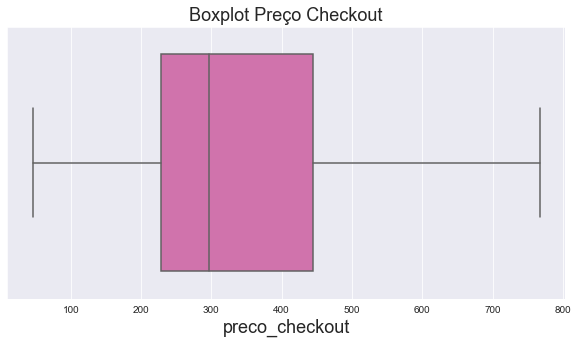

In [36]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Preço Checkout', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='preco_checkout', data=df, palette='PuRd')

plt.show()

### Variável Quantidade pedido

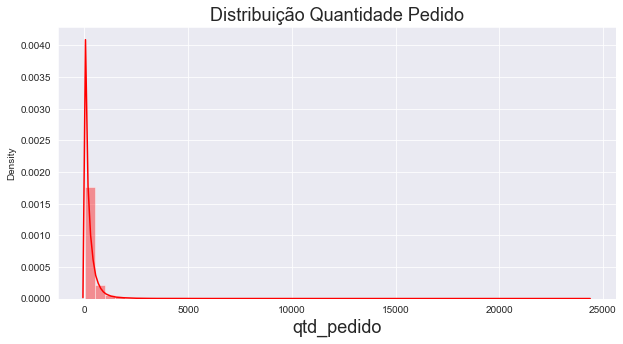

In [37]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.qtd_pedido, color='r')

plt.show()

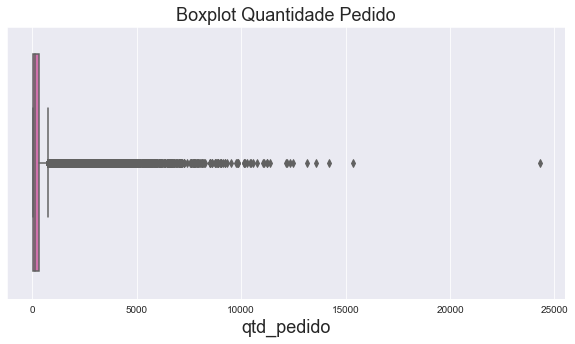

In [38]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='qtd_pedido', data=df, palette='PuRd')

plt.show()

### Usar transformação em log para transformar em uma distribuição normal

In [39]:
df.qtd_pedido = np.log(df.qtd_pedido)
display(df.head())

,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido,categoria,cozinha,cidade_codigo,regiao_codigo,loja_tipo,op_area
0,1,55,1885,136.83,152.29,False,False,5.176150,Beverages,Thai,647,56,TYPE_C,2.0
1,2,55,1885,135.83,152.29,False,False,5.777652,Beverages,Thai,647,56,TYPE_C,2.0
2,3,55,1885,132.92,133.92,False,False,4.564348,Beverages,Thai,647,56,TYPE_C,2.0
3,4,55,1885,135.86,134.86,False,False,5.093750,Beverages,Thai,647,56,TYPE_C,2.0
4,5,55,1885,146.50,147.50,False,False,5.370638,Beverages,Thai,647,56,TYPE_C,2.0


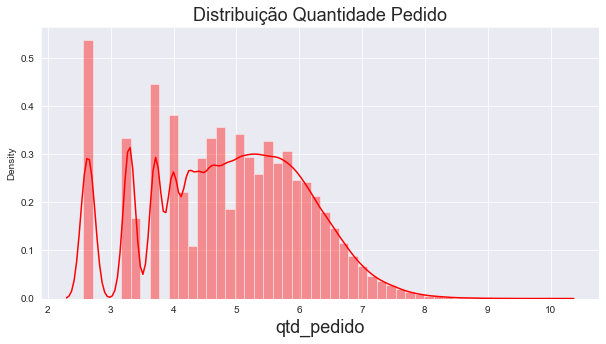

In [41]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.qtd_pedido, color='r')

plt.show()

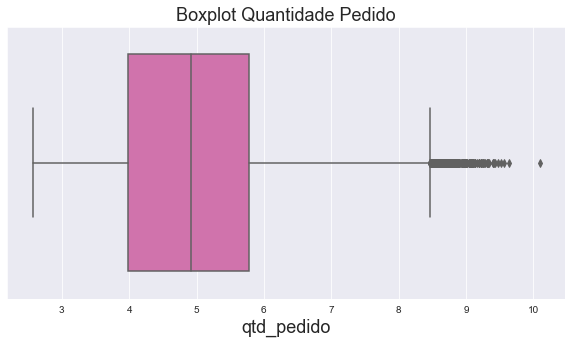

In [42]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='qtd_pedido', data=df, palette='PuRd')

plt.show()

### Remover outliers usando Amplitude Interquartil

In [43]:
df = amplitude_interquartil(df, df.qtd_pedido.sort_values())

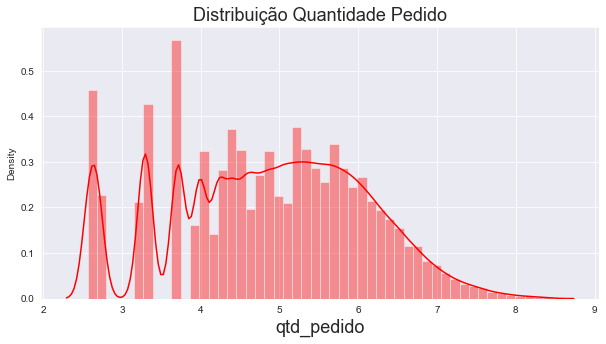

In [44]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.qtd_pedido, color='r')

plt.show()

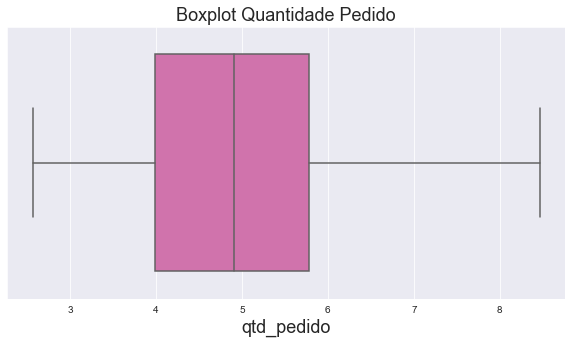

In [45]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Quantidade Pedido', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='qtd_pedido', data=df, palette='PuRd')

plt.show()

### Análise de relacionamento

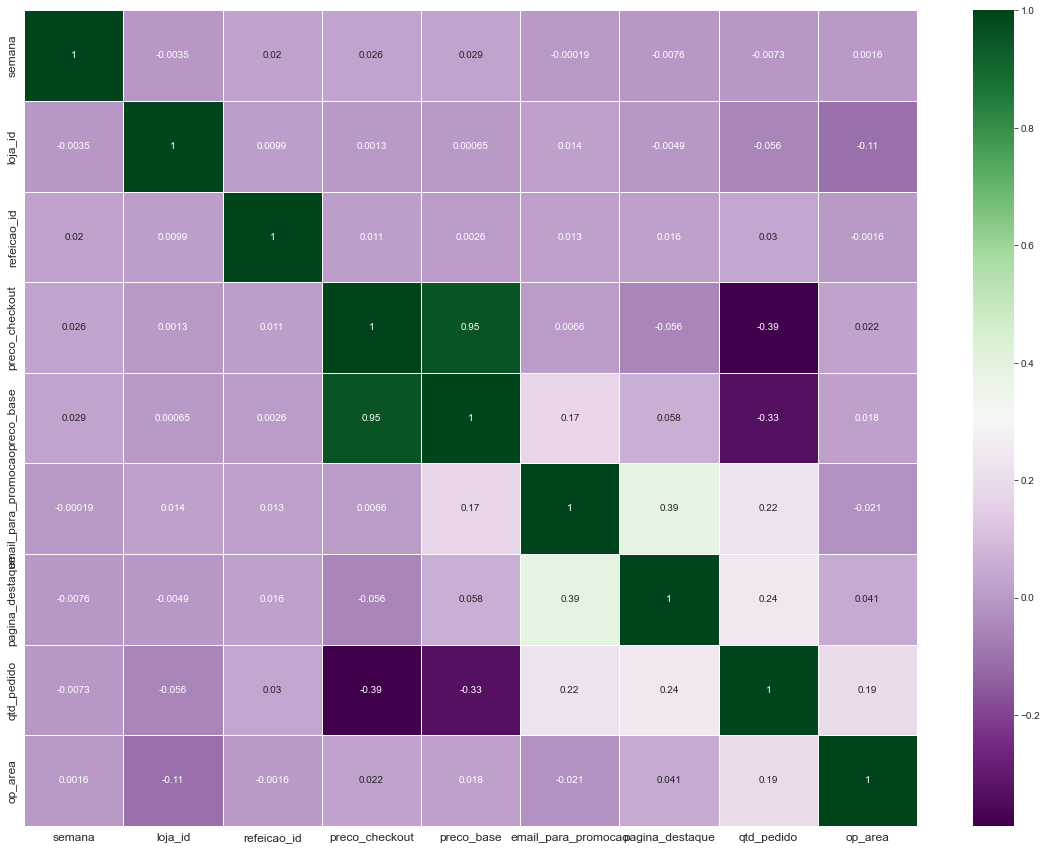

In [46]:
correlations = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlations, annot=True, cmap="PRGn", linewidths=.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [47]:
#profile = ProfileReport(df, minimal=False, title="Pandas Profiling Report", html={'style':{'full_width':True}})

In [48]:
%%time
#profile.to_file("relatorio.html")

Wall time: 0 ns


## Refeições mais vendidas

In [49]:
df.refeicao_id.unique() # Sabemos que tem 51 tipos de refeições diferentes

array([1885, 1993, 2539, 2139, 2631, 1248, 1778, 1062, 2707, 1207, 1230,
       2322, 2290, 1727, 1109, 2640, 2306, 2126, 2826, 1754, 1971, 1902,
       1311, 1803, 1558, 2581, 1962, 1445, 2444, 2867, 1525, 2704, 2304,
       2577, 1878, 1216, 1247, 1770, 1198, 2760, 2492, 1543, 2664, 2569,
       2490, 1571, 2956, 1438, 2494, 1847, 2104], dtype=int64)

In [50]:
top_refeicao = df[['refeicao_id', 'qtd_pedido']].groupby('refeicao_id').sum().sort_values(by='qtd_pedido', ascending=True) \
.tail(10)
display(top_refeicao)

,qtd_pedido
refeicao_id,
1971,63139.035657
1727,63630.429156
2826,64650.618865
1062,65481.346126
2707,66041.524786
1109,67154.663584
1754,67158.539469
1993,67965.593365
1885,69497.143363


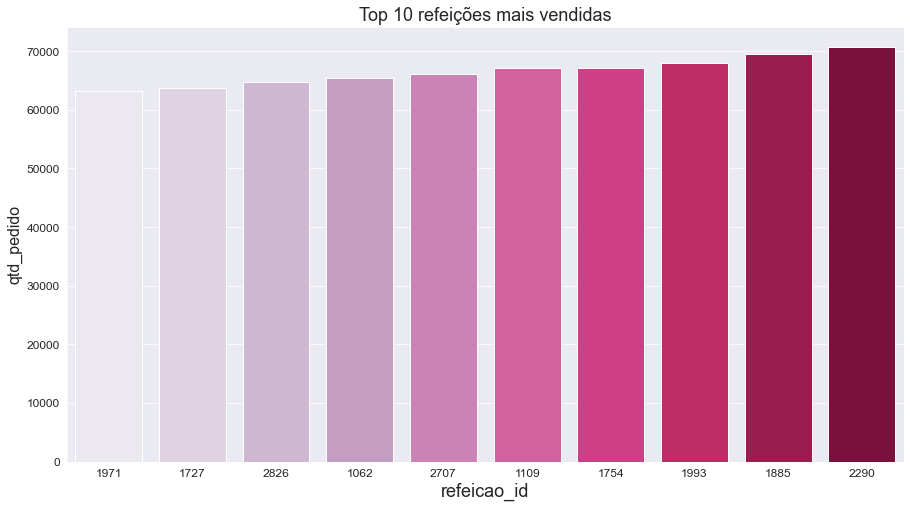

In [104]:
plt.figure(figsize=(15,8))
plt.title('Top 10 refeições mais vendidas', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

ax = sns.barplot(x=top_refeicao.index,
            y="qtd_pedido",
            order=top_refeicao.index,
            palette="PuRd",
            data=top_refeicao)

## Refeições que geram maior receita

In [52]:
df['valor_final'] = (df['qtd_pedido'] * df['preco_checkout']).round(2)

In [53]:
df.head()

,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido,categoria,cozinha,cidade_codigo,regiao_codigo,loja_tipo,op_area,valor_final
0,1,55,1885,136.83,152.29,False,False,5.176150,Beverages,Thai,647,56,TYPE_C,2.0,708.25
1,2,55,1885,135.83,152.29,False,False,5.777652,Beverages,Thai,647,56,TYPE_C,2.0,784.78
2,3,55,1885,132.92,133.92,False,False,4.564348,Beverages,Thai,647,56,TYPE_C,2.0,606.69
3,4,55,1885,135.86,134.86,False,False,5.093750,Beverages,Thai,647,56,TYPE_C,2.0,692.04
4,5,55,1885,146.50,147.50,False,False,5.370638,Beverages,Thai,647,56,TYPE_C,2.0,786.80


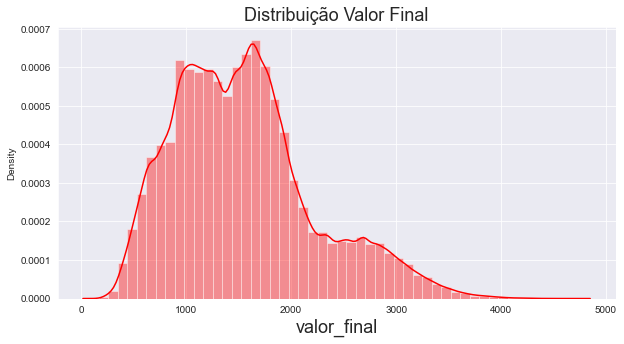

In [54]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.valor_final, color='r')

plt.show()

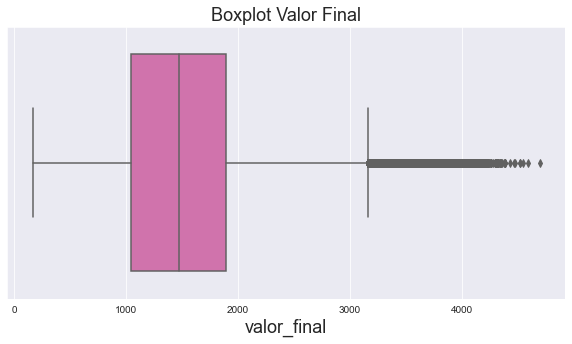

In [55]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='valor_final', data=df, palette='PuRd')

plt.show()

### Usar transformação em log para ficar em uma escala menor

In [56]:
df.valor_final = np.log(df.valor_final)
display(df.head())

,semana,loja_id,refeicao_id,preco_checkout,preco_base,email_para_promocao,pagina_destaque,qtd_pedido,categoria,cozinha,cidade_codigo,regiao_codigo,loja_tipo,op_area,valor_final
0,1,55,1885,136.83,152.29,False,False,5.176150,Beverages,Thai,647,56,TYPE_C,2.0,6.562797
1,2,55,1885,135.83,152.29,False,False,5.777652,Beverages,Thai,647,56,TYPE_C,2.0,6.665403
2,3,55,1885,132.92,133.92,False,False,4.564348,Beverages,Thai,647,56,TYPE_C,2.0,6.408018
3,4,55,1885,135.86,134.86,False,False,5.093750,Beverages,Thai,647,56,TYPE_C,2.0,6.539644
4,5,55,1885,146.50,147.50,False,False,5.370638,Beverages,Thai,647,56,TYPE_C,2.0,6.667974


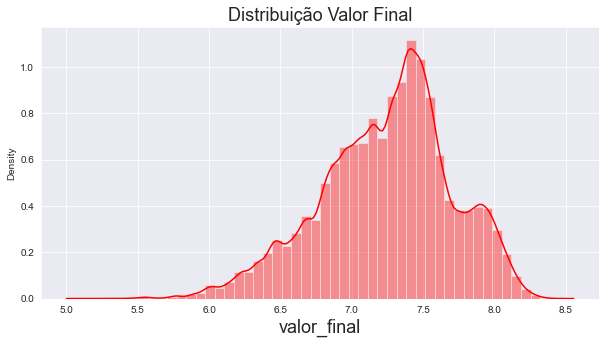

In [57]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.valor_final, color='r')

plt.show()

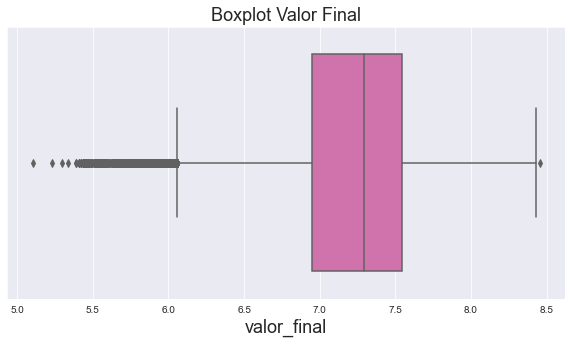

In [58]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='valor_final', data=df, palette='PuRd')

plt.show()

### Remover outliers usando Amplitude Interquartil

In [59]:
df = amplitude_interquartil(df, df.valor_final.sort_values())

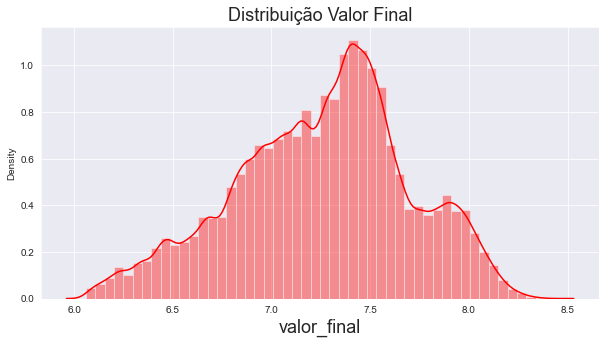

In [60]:
plt.figure(figsize=(10,5))
plt.title('Distribuição Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.distplot(df.valor_final, color='r')

plt.show()

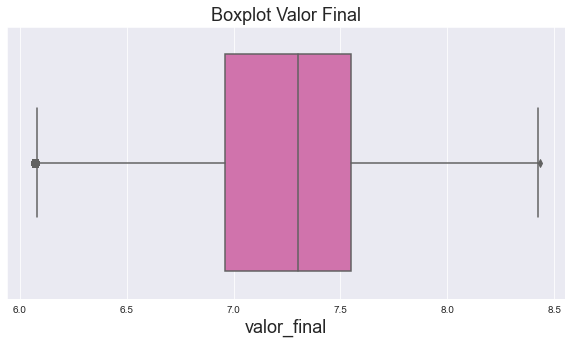

In [61]:
plt.figure(figsize=(10,5))
plt.title('Boxplot Valor Final', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='valor_final', data=df, palette='PuRd')

plt.show()

In [62]:
top_receita = df[['refeicao_id', 'valor_final']].groupby('refeicao_id').sum() \
                                                                    .sort_values(by='valor_final', ascending=True).tail(10)
display(top_receita)

,valor_final
refeicao_id,
1971,81510.077117
2290,81828.814792
1109,81893.297951
2322,81962.734726
1754,82295.786410
2826,82566.961344
1727,86157.581601
1558,86337.785131
2581,88130.611912


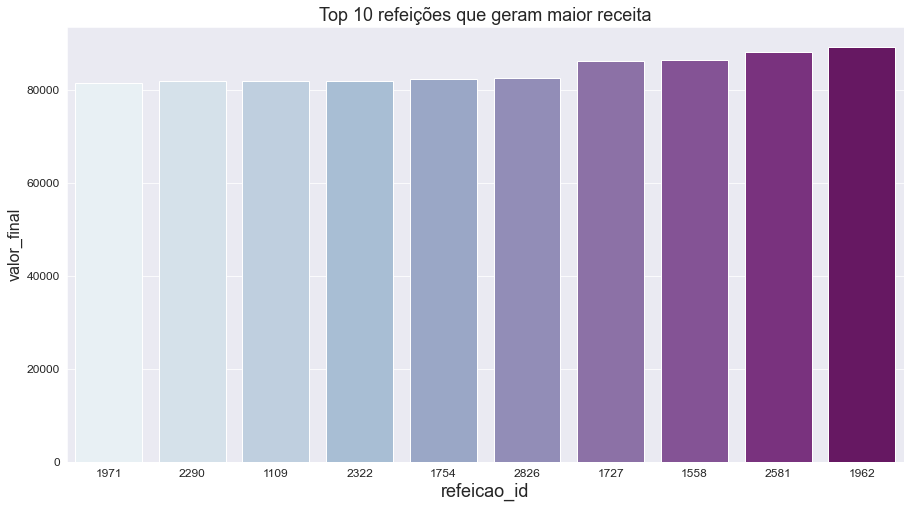

In [66]:
plt.figure(figsize=(15,8))
plt.title('Top 10 refeições que geram maior receita', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

sns.barplot(x=top_receita.index,
            y="valor_final",
            order=top_receita.index,
            palette="BuPu",
            data=top_receita)

plt.show()

## Melhores lojas

In [64]:
top_loja_pedido = df[['loja_id', 'qtd_pedido']].groupby('loja_id').sum().sort_values(by='qtd_pedido', ascending=True).tail(10)
top_loja_pedido

,qtd_pedido
loja_id,
51,34831.408511
108,35280.648212
11,35930.080827
174,36398.230537
137,36902.822951
67,36982.481706
52,38216.520780
43,38570.275226
10,39346.937000


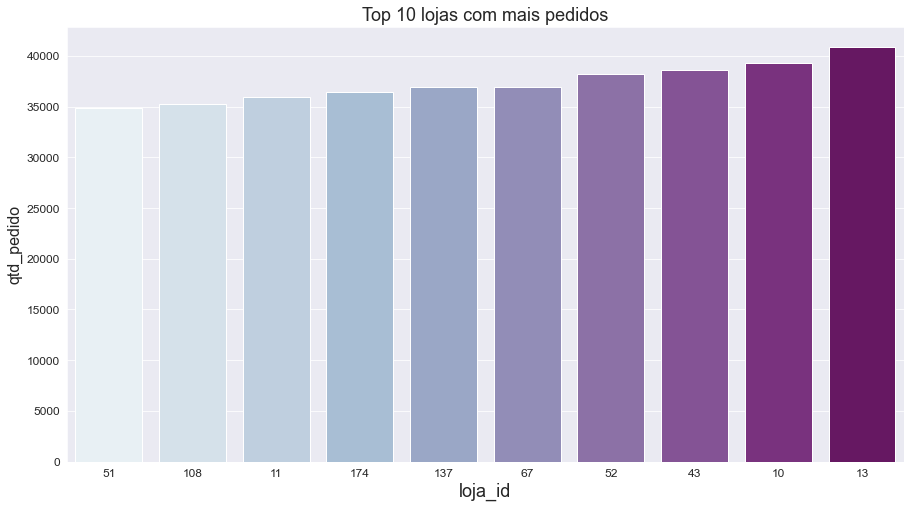

In [67]:
plt.figure(figsize=(15,8))
plt.title('Top 10 lojas com mais pedidos', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

sns.barplot(x=top_loja_pedido.index,
            y="qtd_pedido",
            order=top_loja_pedido.index,
            palette="BuPu",
            data=top_loja_pedido)

plt.show()

In [69]:
top_loja_faturamento = df[['loja_id', 'valor_final']].groupby('loja_id').sum() \
                                                            .sort_values(by='valor_final', ascending=True).tail(10)
top_loja_faturamento

,valor_final
loja_id,
27,49714.146513
108,49894.553745
51,50029.395506
137,50531.139983
174,50533.767687
67,50725.905717
43,51181.376204
52,51517.854160
10,51924.017633


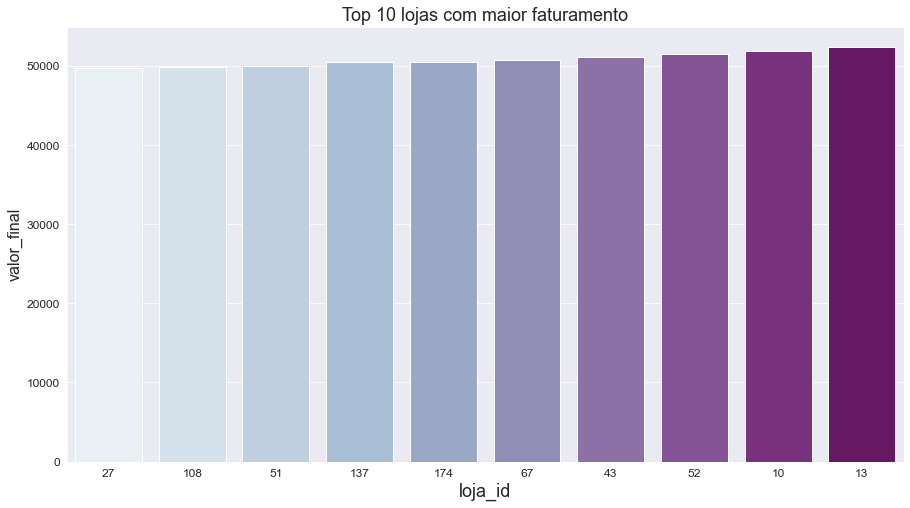

In [70]:
plt.figure(figsize=(15,8))
plt.title('Top 10 lojas com maior faturamento', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)

sns.barplot(x=top_loja_faturamento.index,
            y="valor_final",
            order=top_loja_faturamento.index,
            palette="BuPu",
            data=top_loja_faturamento)

plt.show()

## Qual o preço médio das refeições?

In [72]:
preco_medio = round(df.preco_checkout.mean(), 2)
print(f'O preço médio das refeições é {preco_medio}')

O preço médio das refeições é 334.48


## Qual a tendência das vendas?

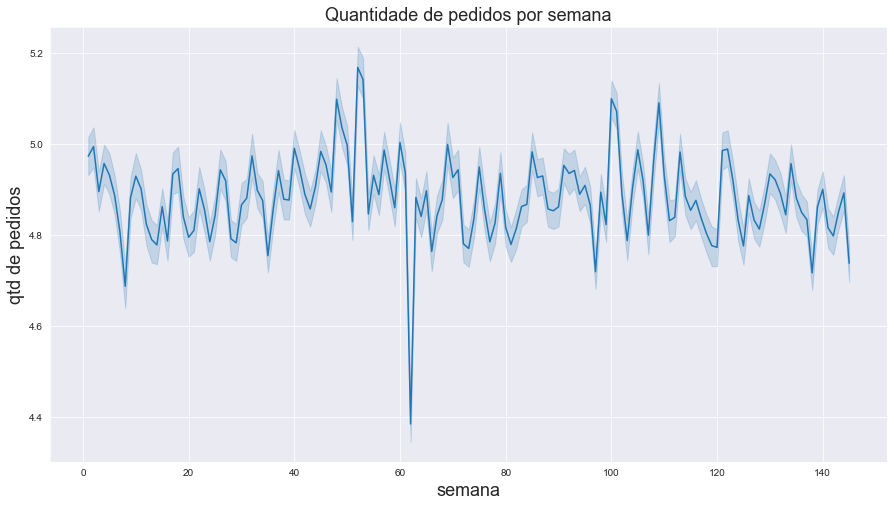

In [73]:
plt.figure(figsize=(15,8))
plt.title('Quantidade de pedidos por semana', fontsize=18)
plt.xlabel('',fontsize=18)
plt.ylabel('qtd de pedidos', fontsize=18)

sns.lineplot(df.semana, df.qtd_pedido)

plt.show()

Nesta análise acima o formato de "data" ainda não é o mais adequado

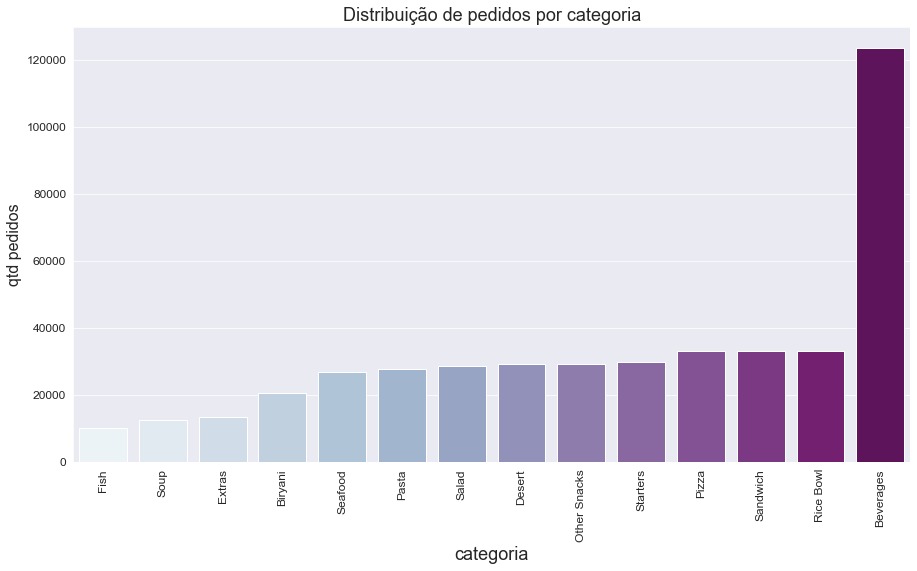

In [74]:
plt.figure(figsize=(15,8))
plt.title('Distribuição de pedidos por categoria', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('categoria', fontsize=18)
plt.ylabel('qtd pedidos', fontsize=16)

sns.barplot(x=df.categoria.value_counts().sort_values(ascending=True).index,
            y=df.categoria.value_counts().sort_values(ascending=True).values,
            order=df.categoria.value_counts().sort_values(ascending=True).index,
            palette="BuPu",)

plt.show()

A diferença entre bebida e as outras categorias é enorme

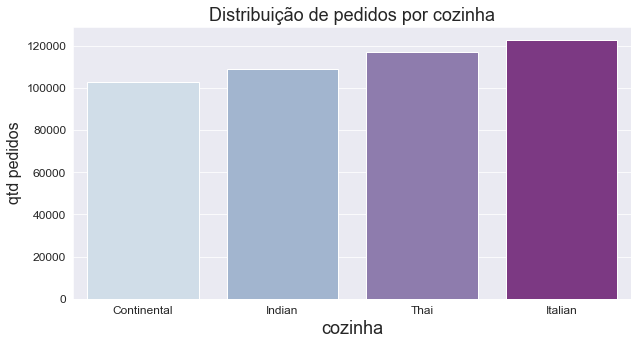

In [75]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de pedidos por cozinha', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('cozinha', fontsize=18)
plt.ylabel('qtd pedidos', fontsize=16)

sns.barplot(x=df.cozinha.value_counts().sort_values(ascending=True).index,
            y=df.cozinha.value_counts().sort_values(ascending=True).values,
            order=df.cozinha.value_counts().sort_values(ascending=True).index,
            palette="BuPu",)

plt.show()

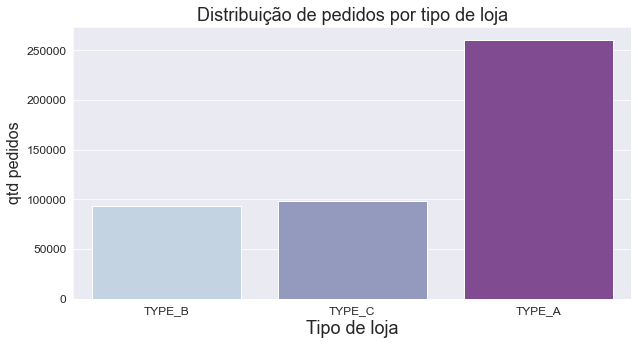

In [76]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de pedidos por tipo de loja', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Tipo de loja', fontsize=18)
plt.ylabel('qtd pedidos', fontsize=16)

sns.barplot(x=df.loja_tipo.value_counts().sort_values(ascending=True).index,
            y=df.loja_tipo.value_counts().sort_values(ascending=True).values,
            order=df.loja_tipo.value_counts().sort_values(ascending=True).index,
            palette="BuPu",)

plt.show()

### Verifiquei se o tipo de loja A fornece alguma refeição diferente das outras para tentar explicar esse número de pedidos discrepante, porém todas fornecem as mesmas refeições

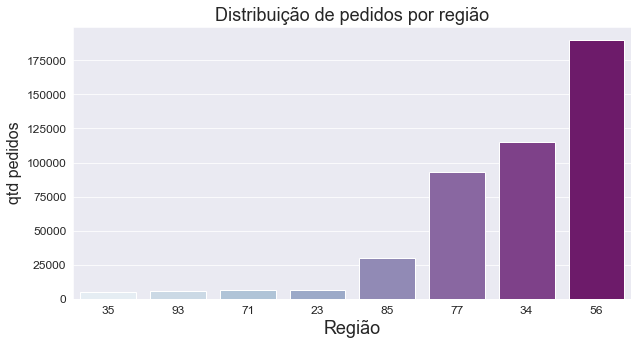

In [82]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de pedidos por região', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Região', fontsize=18)
plt.ylabel('qtd pedidos', fontsize=16)

sns.barplot(x=df.regiao_codigo.value_counts().sort_values(ascending=True).index,
            y=df.regiao_codigo.value_counts().sort_values(ascending=True).values,
            order=df.regiao_codigo.value_counts().sort_values(ascending=True).index,
            palette="BuPu",)

plt.show()

### Transformar a semana em data para poder trabalhar com série temporal

In [83]:
serie_data = pd.Series(pd.date_range(start='2017-02-01', periods=145, freq='W'))

In [84]:
# Pega o ordinal da semana do ano
ordinal_semana = serie_data.dt.week

In [85]:
time_series = pd.concat([serie_data, ordinal_semana], axis=1)

In [86]:
time_series.rename(columns = {0 : "data",
                              1 : "semana"}, inplace=True)

In [87]:
df_time_series = df.copy()

In [88]:
df_time_series = time_series.merge(df_time_series, on='semana', how='left')

In [89]:
serie_temporal = df_time_series[['data', 'qtd_pedido']].groupby('data').sum()

In [90]:
serie_temporal.head()

,qtd_pedido
data,
2017-02-05,13628.937591
2017-02-12,13777.952868
2017-02-19,13297.125357
2017-02-26,13037.700146
2017-03-05,13929.214836


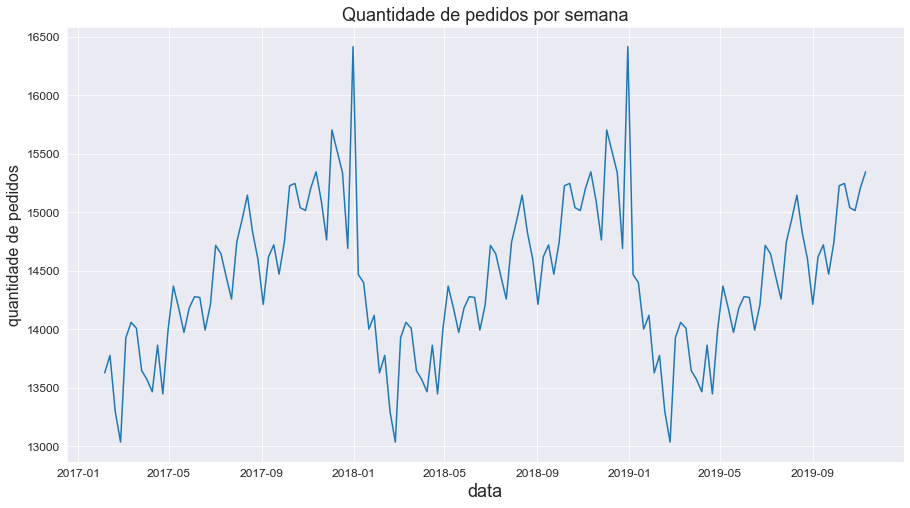

In [106]:
plt.figure(figsize=(15,8))
plt.title('Quantidade de pedidos por semana', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('data', fontsize=18)
plt.ylabel('quantidade de pedidos', fontsize=16)

sns.lineplot(x=serie_temporal.index,
            y="qtd_pedido",
            data=serie_temporal)

plt.show()

###  Aplicando a média móvel para eliminação de ruído

<AxesSubplot:xlabel='data'>

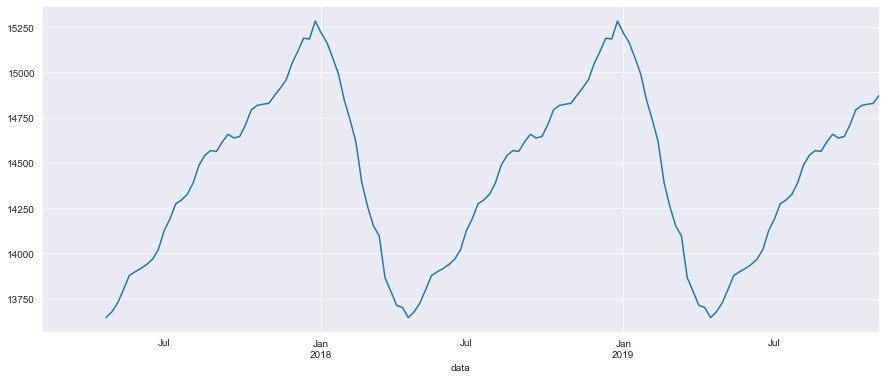

In [92]:
serie_temporal.qtd_pedido.rolling(12).mean().plot(figsize=(15,6))

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposição usando médias móveis
from statsmodels.tsa.seasonal import STL #Decomposição de tendência sazonal

In [94]:
resultados = seasonal_decompose(serie_temporal.qtd_pedido, freq=7)

In [95]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    
    plt.legend(fontsize=18)

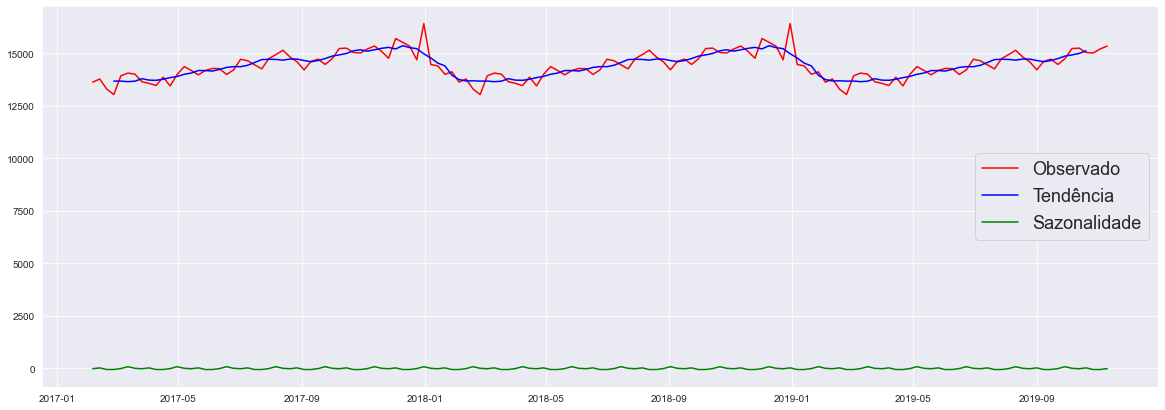

In [96]:
plotar(resultados.observed, resultados.trend, resultados.seasonal,
      'red', 'blue', 'green',
      'Observado', 'Tendência', 'Sazonalidade')

<Figure size 432x288 with 0 Axes>

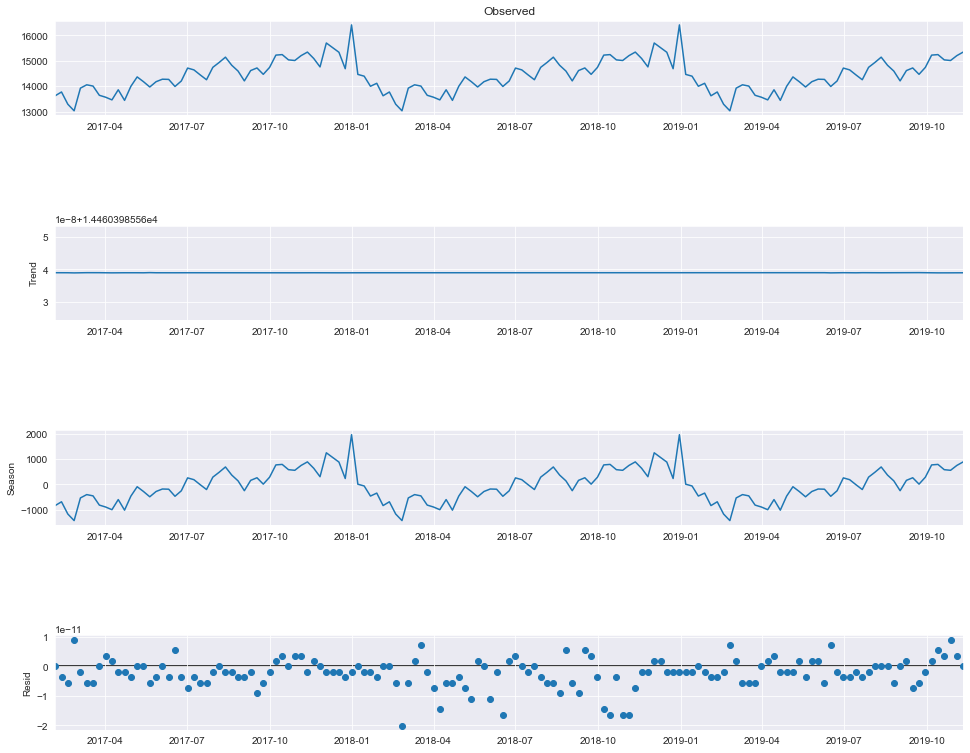

In [97]:
res = STL(serie_temporal).fit()
fig = plt.figure()
fig = res.plot()
fig.set_size_inches(15, 12)
plt.show()

## O que traz mais retorno: anunciar a comida na homepage ou enviar email?

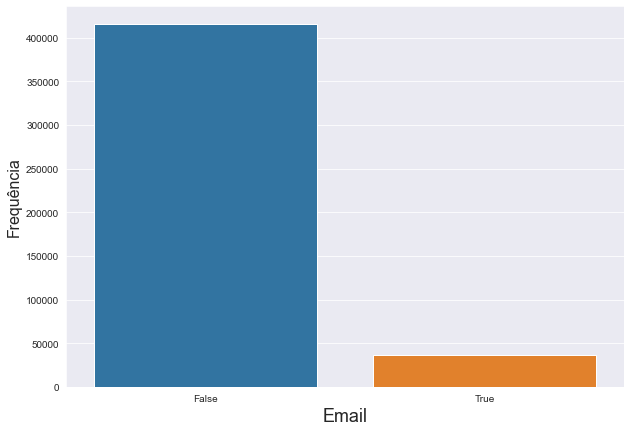

In [98]:
plt.figure(figsize=(10,7))

plt.xlabel('Email', fontsize=18)
plt.ylabel('Frequência', fontsize=16)

sns.barplot(data=df,
            x=df.email_para_promocao.value_counts().index,
            y=df.email_para_promocao.value_counts().values
           )

plt.show()

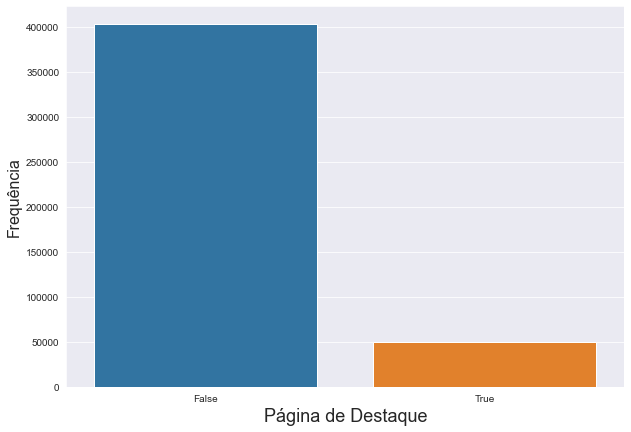

In [99]:
plt.figure(figsize=(10,7))

plt.xlabel('Página de Destaque', fontsize=18)
plt.ylabel('Frequência', fontsize=16)

sns.barplot(data=df,
            x=df.pagina_destaque.value_counts().index,
            y=df.pagina_destaque.value_counts().values
           )

plt.show()

In [102]:
df.email_para_promocao.value_counts()

False    415263
True      36588
Name: email_para_promocao, dtype: int64

In [103]:
df.pagina_destaque.value_counts()

False    402507
True      49344
Name: pagina_destaque, dtype: int64

### Teve mais pedidos pela página inicial do que feito pelo email

### Arquivo criado para usar na aplicação com streamlit

In [ ]:
df_streamlit = df.sample(n=200000)

In [ ]:
df_streamlit.to_csv('streamlit.csv', index=False, sep=',')